
### Function: `initialize_parameters(layer_dims)`

**Purpose**
Initializes the weights and biases for a deep, fully connected feedforward neural network.

---

**Parameters**

* `layer_dims` (`list` of `int`):
  A list containing the number of units in each layer of the network, including the input and output layers.
  Example: For a network with 5 input features, 4 hidden units in the first hidden layer, and 3 output units, use:
  `layer_dims = [5, 4, 3]`

---

**Returns**

* `parameters` (`dict`):
  A dictionary containing the initialized parameters:

  * `W1`, `W2`, ..., `W{L-1}`: weight matrices of shape `(layer_dims[l], layer_dims[l-1])`
  * `b1`, `b2`, ..., `b{L-1}`: bias vectors of shape `(layer_dims[l], 1)`
    where `L` is the total number of layers including the input layer.

---

**Initialization Details**

* Weights `Wl` are initialized using a standard normal distribution (`np.random.randn`), which produces small random values with mean 0 and variance 1. This randomness helps break symmetry between neurons.
* Biases `bl` are initialized to zeros, which is standard practice and does not hinder the learning process in most architectures.

> Note: In practice, more sophisticated initialization methods such as He or Xavier initialization are preferred for deep networks to ensure better convergence properties. This implementation uses simple Gaussian initialization for educational clarity.

---

**Example Usage**

```python
layer_dims = [5, 4, 3]
parameters = initialize_parameters(layer_dims)

# parameters['W1'].shape = (4, 5)
# parameters['b1'].shape = (4, 1)
# parameters['W2'].shape = (3, 4)
# parameters['b2'].shape = (3, 1)
```



In [3]:
def initialize_parameters(layer_dims):
    np.random.seed(3); parameters = {}; L = len(layer_dims)
    for l in range(1, L):
        parameters['W'+ str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
        parameters['b'+ str(l)] = np.zeros((layer_dims[l], 1))
    return parameters


### Function: `linear_forward(A, W, b)`

**Purpose**
Computes the linear part of a forward propagation step for a single layer in a neural network.

---

**Parameters**

* `A` (`ndarray`):
  Activations from the previous layer (or input data in the case of the first layer).
  Shape: `(size of previous layer, number of examples)`

* `W` (`ndarray`):
  Weight matrix for the current layer.
  Shape: `(size of current layer, size of previous layer)`

* `b` (`ndarray`):
  Bias vector for the current layer.
  Shape: `(size of current layer, 1)`

---

**Returns**

* `Z` (`ndarray`):
  The linear output of the current layer before applying the activation function.
  Computed as: `Z = W·A + b`
  Shape: `(size of current layer, number of examples)`

* `cache` (`tuple`):
  A tuple containing `(A, W, b)`.
  This is stored for use in the backward propagation step to compute gradients.

---

**Mathematical Formula**

$$
Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}
$$

Where:

* $Z^{[l]}$: pre-activation output of layer $l$
* $A^{[l-1]}$: activation from previous layer
* $W^{[l]}$: weights matrix of layer $l$
* $b^{[l]}$: bias vector of layer $l$

---




In [6]:
def linear_forward(A,W,b):
    Z = np.dot(W, A)+ b
    cache = (A,W,b)
    return Z, cache

### Function: `relu(Z)`

**Purpose**
Applies the ReLU (Rectified Linear Unit) activation function element-wise to the input `Z`. Commonly used in hidden layers of neural networks due to its simplicity and effectiveness.

---

**Parameters**

* `Z` (`ndarray`):
  Linear output of a layer (pre-activation), shape `(size of current layer, number of examples)`.

---

**Returns**

* `A` (`ndarray`):
  Post-activation output, where each element is `max(0, z)`. Same shape as `Z`.

* `cache` (`ndarray`):
  Stores `Z` for use during backpropagation.

---

**Mathematical Formula**

$$
\text{ReLU}(z) = \max(0, z)
$$

---

### Function: `sigmoid(Z)`

**Purpose**
Applies the sigmoid activation function element-wise to the input `Z`. Commonly used in output layers for binary classification tasks.

---

**Parameters**

* `Z` (`ndarray`):
  Linear output of a layer (pre-activation), shape `(size of current layer, number of examples)`.

---

**Returns**

* `A` (`ndarray`):
  Post-activation output, where each element is in the range (0, 1).
  Computed as: $A = \frac{1}{1 + e^{-Z}}$

* `cache` (`ndarray`):
  Stores `Z` for use during backpropagation.

---

**Mathematical Formula**

$$
\text{Sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

---



In [9]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z 
    return A, cache

In [11]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

### Function: `linear_activation_forward(A_prev, W, b, a)`

**Purpose**
Computes the forward propagation for a single layer of the neural network, applying both the linear transformation and the specified activation function (`"relu"` or `"sigmoid"`).

---

**Parameters**

* `A_prev` (`ndarray`):
  Activations from the previous layer (or input data for the first layer).
  Shape: `(size of previous layer, number of examples)`

* `W` (`ndarray`):
  Weight matrix for the current layer.
  Shape: `(size of current layer, size of previous layer)`

* `b` (`ndarray`):
  Bias vector for the current layer.
  Shape: `(size of current layer, 1)`

* `a` (`str`):
  Activation function to apply. Must be one of:

  * `'relu'` – uses the `relu(Z)` function
  * `'sigmoid'` – uses the `sigmoid(Z)` function

---

**Returns**

* `A` (`ndarray`):
  Output of the activation function, also the activation for the next layer.
  Shape: `(size of current layer, number of examples)`

* `cache` (`tuple`):
  Tuple containing:

  * `linear_cache`: a tuple `(A_prev, W, b)` used in backpropagation
  * `activation_cache`: the intermediate value `Z` before applying activation

---

**Computation Steps**

1. Compute the linear transformation:

   $$
   Z = W \cdot A_{\text{prev}} + b
   $$
2. Apply the specified activation function:

   * If `'relu'`: use `relu(Z)`
   * If `'sigmoid'`: use `sigmoid(Z)`

---




In [14]:
def linear_activation_forward(A_prev, W, b, a):
    Z = np.dot(W, A_prev) + b
    linear_cache = (A_prev, W, b)

    if a == 'sigmoid':
        A, activation_cache = sigmoid(Z)
    elif a == 'relu':
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    return A, cache



### Function: `L_layers_model_forward(X, parameters)`

**Purpose**
Implements the forward propagation for an L-layer deep neural network. It applies a series of linear transformations followed by activation functions (ReLU for hidden layers, sigmoid for the output layer).

---

**Parameters**

* `X` (`ndarray`):
  Input data of shape `(number of input features, number of examples)`

* `parameters` (`dict`):
  Dictionary containing the parameters `W1`, `b1`, ..., `WL`, `bL` for each layer.
  These should have been initialized using a function such as `initialize_parameters_deep`.

---

**Returns**

* `AL` (`ndarray`):
  Output of the last layer, representing the model's prediction.
  Shape: `(1, number of examples)` for binary classification.

* `caches` (`list` of `tuples`):
  List of caches from each layer, where each cache is a tuple containing:

  * `linear_cache = (A_prev, W, b)`
  * `activation_cache = Z`
    These are used later for backpropagation.

---

**Computation Flow**

1. Loop over layers `1` to `L-1`:

   * Apply `linear -> ReLU` forward pass.
   * Store cache for each layer.
2. On the final layer `L`:

   * Apply `linear -> sigmoid` forward pass.
   * Store final cache.

---

**Mathematical Summary**
Let $L$ be the total number of layers (excluding input). Then:

* For $l = 1$ to $L-1$:

  $$
  Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}, \quad A^{[l]} = \text{ReLU}(Z^{[l]})
  $$

* For layer $L$:

  $$
  Z^{[L]} = W^{[L]} A^{[L-1]} + b^{[L]}, \quad A^{[L]} = \sigma(Z^{[L]})
  $$

---



In [17]:
def L_layers_model_forward(X, parameters):
    caches = []
    A = X
    # number of layers in the network:
    L = len(parameters) // 2  

    # Loop over layers 1 to L-1 using ReLU
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev,
            W=parameters["W" + str(l)],
            b=parameters["b" + str(l)],
            a='relu'
        )
        caches.append(cache)

    # Final layer using sigmoid activation (binary classification : {0,1})
    AL, cache = linear_activation_forward(
        A,
        W=parameters["W" + str(L)],
        b=parameters["b" + str(L)],
        a='sigmoid'
    )
    caches.append(cache)

    return AL, caches



### Function: `cost_function(AL, Y)`

**Purpose**
Computes the cross-entropy cost for a binary classification problem. This cost function measures the difference between the predicted probabilities `AL` and the true labels `Y`.

---

**Parameters**

* `AL` (`ndarray`):
  Probability vector corresponding to the predictions of the model.
  Shape: `(1, number of examples)` — values in the range (0, 1), typically output of a sigmoid activation.

* `Y` (`ndarray`):
  True binary labels.
  Shape: `(1, number of examples)` — values are 0 or 1.

---

**Returns**

* `cost` (`float`):
  The cross-entropy loss value. This is a scalar and is squeezed to remove any extra dimensions.

---

**Mathematical Formula**
Given $m$ training examples, the cost is computed as:

$$
J = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(a_L^{(i)}) + (1 - y^{(i)}) \log(1 - a_L^{(i)}) \right]
$$

Where:

* $y^{(i)}$ is the true label for the $i$-th example.
* $a_L^{(i)}$ is the predicted probability for the $i$-th example from the output layer.

---

**Example Usage**

```python
AL = np.array([[0.8, 0.3, 0.9]])
Y = np.array([[1, 0, 1]])
cost = cost_function(AL, Y)
# cost ≈ small positive scalar
```

---

**Note on Numerical Stability** : 
To avoid potential issues with taking `log(0)`, We considered adding a small epsilon value to `AL` during computation:

```python
epsilon = 1e-8
cost = (-1/m) * np.sum(
    Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon)
)
```

This prevents undefined or infinite values during training.

---



In [76]:
def cost_function(AL, Y):
    m = Y.shape[1]
    epsilon = 1e-8
    cost = (-1/m) * np.sum(
    Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon)
    )
    cost = np.squeeze(cost)
    return cost


### Function: `sigmoid_backward(dA, activation_cache)`

**Purpose**
Computes the gradient of the loss with respect to `Z` for a layer using the sigmoid activation function, given the upstream gradient `dA`.

---

**Parameters**

* `dA` (`ndarray`):
  Gradient of the loss with respect to the activation output `A` of the current layer.
  Shape: `(size of current layer, number of examples)`

* `activation_cache` (`ndarray`):
  The input `Z` to the sigmoid activation function, cached during the forward pass.

---

**Returns**

* `dZ` (`ndarray`):
  Gradient of the loss with respect to the linear input `Z`.
  Computed as:

  $$
  dZ = dA \cdot \sigma(Z) \cdot (1 - \sigma(Z))
  $$

---

### Function: `relu_backward(dA, activation_cache)`

**Purpose**
Computes the gradient of the loss with respect to `Z` for a layer using the ReLU activation function, given the upstream gradient `dA`.

---

**Parameters**

* `dA` (`ndarray`):
  Gradient of the loss with respect to the activation output `A` of the current layer.
  Shape: `(size of current layer, number of examples)`

* `activation_cache` (`ndarray`):
  The input `Z` to the ReLU activation function, cached during the forward pass.

---

**Returns**

* `dZ` (`ndarray`):
  Gradient of the loss with respect to the linear input `Z`, where `dZ = dA` for `Z > 0`, and `0` otherwise.

---

### Function: `linear_backward(dZ, cache)`

**Purpose**
Computes the gradient of the loss with respect to the linear inputs of the current layer (`A_prev`, `W`, `b`) during backpropagation.

---

**Parameters**

* `dZ` (`ndarray`):
  Gradient of the loss with respect to the linear output `Z` of the current layer.
  Shape: `(size of current layer, number of examples)`

* `cache` (`tuple`):
  Tuple `(A_prev, W, b)` containing:

  * `A_prev`: activations from the previous layer
  * `W`: weights matrix of the current layer
  * `b`: bias vector of the current layer

---

**Returns**

* `dA_prev` (`ndarray`):
  Gradient of the loss with respect to the activation of the previous layer.
  Shape: `(size of previous layer, number of examples)`

* `dW` (`ndarray`):
  Gradient with respect to the weights `W`.
  Shape: same as `W`

* `db` (`ndarray`):
  Gradient with respect to the biases `b`.
  Shape: same as `b`

---

**Mathematical Computation**
Given $m$ examples:

$$
\begin{aligned}
dW &= \frac{1}{m} dZ \cdot A_{\text{prev}}^T \\
db &= \frac{1}{m} \sum dZ \\
dA_{\text{prev}} &= W^T \cdot dZ
\end{aligned}
$$


---



In [25]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    A = 1 / (1 + np.exp(-Z))
    dZ = dA * A * (1 - A)
    return dZ

def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True)
    dZ[ Z <= 0 ] = 0
    return dZ

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db


### Function: `linear_activation_backward(dA, cache, activation)`

**Purpose**
Computes the backward propagation for a single layer (linear + activation). This function handles both the activation-specific derivative (`ReLU` or `Sigmoid`) and the linear backpropagation step.

---

**Parameters**

* `dA` (`ndarray`):
  Gradient of the loss with respect to the activation output `A` of the current layer.
  Shape: `(size of current layer, number of examples)`

* `cache` (`tuple`):
  A tuple `(linear_cache, activation_cache)` where:

  * `linear_cache`: contains `(A_prev, W, b)` from the forward pass
  * `activation_cache`: contains `Z`, the pre-activation value

* `activation` (`str`):
  The activation function used in the current layer. Must be one of:

  * `"relu"`
  * `"sigmoid"`

---

**Returns**

* `dA_prev` (`ndarray`):
  Gradient of the loss with respect to the activation output of the previous layer (`A_prev`).
  Shape: `(size of previous layer, number of examples)`

* `dW` (`ndarray`):
  Gradient of the loss with respect to the weights `W`.
  Shape: same as `W`

* `db` (`ndarray`):
  Gradient of the loss with respect to the biases `b`.
  Shape: same as `b`

---

**Computation Steps**

1. Compute `dZ` using the appropriate activation backward function:

   * If `activation == "relu"`: use `relu_backward(dA, activation_cache)`
   * If `activation == "sigmoid"`: use `sigmoid_backward(dA, activation_cache)`
2. Compute the gradients with respect to `A_prev`, `W`, and `b` using:

   $$
   \texttt{linear\_backward}(dZ, linear\_cache)
   $$

---



In [28]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
     
        
    elif activation == "sigmoid":
    
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db


### Function: `L_layers_model_backward(AL, Y, caches)`

**Purpose**
Implements the full backward propagation for an L-layer deep neural network. The network architecture is assumed to be:
`[LINEAR → RELU] × (L−1) → LINEAR → SIGMOID`

This function computes all gradients needed for parameter updates.

---

**Parameters**

* `AL` (`ndarray`):
  The output of the forward propagation from the last layer (i.e., predicted probabilities).
  Shape: `(1, number of examples)`

* `Y` (`ndarray`):
  True binary labels.
  Shape: `(1, number of examples)`
  Will be reshaped to match `AL` if needed.

* `caches` (`list`):
  List of caches from the forward pass, where each element is a tuple `(linear_cache, activation_cache)`:

  * The first `L−1` elements correspond to layers using ReLU activation.
  * The last element corresponds to the output layer using sigmoid activation.

---

**Returns**

* `grads` (`dict`):
  Dictionary containing gradients of the loss with respect to parameters and activations at each layer:

  * `grads["dA" + str(l)]`: Gradient of the loss w\.r.t. activation of layer `l`
  * `grads["dW" + str(l + 1)]`: Gradient w\.r.t. weights of layer `l + 1`
  * `grads["db" + str(l + 1)]`: Gradient w\.r.t. biases of layer `l + 1`

---

**Computation Steps**

1. **Initialize backpropagation:**

   $$
   dAL = - \left( \frac{Y}{AL} - \frac{1 - Y}{1 - AL} \right)
   $$

   This is the derivative of the binary cross-entropy loss with respect to the predicted output `AL`.

2. **Compute gradients for the last layer** (`L`):

   * Activation: Sigmoid
   * Use `linear_activation_backward` with `dAL` and the last cache.

3. **Iterate backward from layer `L−1` to `1`:**

   * Activation: ReLU
   * Use the gradients from the layer ahead (`dA[l+1]`) and the current cache.

---



In [31]:
def L_layers_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches)                 # number of layers
    m = AL.shape[1]                # number of data examples
    Y = Y.reshape(AL.shape)       # ensure Y has the same shape as AL

    # Compute initial gradient of cost with respect to AL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Backprop for final layer (sigmoid activation)
    current_cache = caches[-1]
    dA_prev_t, dW_t, db_t = linear_activation_backward(dAL, current_cache, activation='sigmoid')
    
    grads["dA" + str(L - 1)] = dA_prev_t
    grads["dW" + str(L)] = dW_t
    grads["db" + str(L)] = db_t

    # Backprop for layers L-2 to 0 (ReLU activation)
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_t, dW_t, db_t = linear_activation_backward(
            grads["dA" + str(l + 1)],
            current_cache,
            activation='relu'
        )
        grads["dA" + str(l)] = dA_prev_t
        grads["dW" + str(l + 1)] = dW_t
        grads["db" + str(l + 1)] = db_t

    return grads



### Function: `update_parameters(params, grads, learning_rate)`

**Purpose**
Updates the weights and biases of an L-layer neural network using gradient descent, based on the computed gradients from backpropagation.

---

**Parameters**

* `params` (`dict`):
  Dictionary containing the current parameters of the model:

  * `params["W" + str(l)]`: weight matrix for layer `l`
  * `params["b" + str(l)]`: bias vector for layer `l`
    for `l` in `1` to `L`

* `grads` (`dict`):
  Dictionary containing the gradients of the cost with respect to each parameter, as returned by `L_layers_model_backward`:

  * `grads["dW" + str(l)]`
  * `grads["db" + str(l)]`

* `learning_rate` (`float`):
  The learning rate used to scale the gradient during the update step.

---

**Returns**

* `parameters` (`dict`):
  Dictionary containing the updated parameters after one step of gradient descent:

  * `parameters["W" + str(l)]`
  * `parameters["b" + str(l)]`
    for `l` in `1` to `L`

---

**Update Rule**
For each layer $l$:

$$
\begin{aligned}
W^{[l]} &:= W^{[l]} - \alpha \cdot dW^{[l]} \\
b^{[l]} &:= b^{[l]} - \alpha \cdot db^{[l]}
\end{aligned}
$$

Where:

* $\alpha$ is the learning rate
* $dW^{[l]}$ and $db^{[l]}$ are the gradients of the cost with respect to $W^{[l]}$ and $b^{[l]}$

---



In [81]:
def update_parameters(params, grads, learning_rate):
    # Make a copy of the current parameters to avoid modifying the original
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2  # Total number of layers

    # Update weights and biases for each layer using gradient descent
    for l in range(L):
        parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]

    return parameters



## Applying Our Neural Network to a Real-World Dataset

Now that we have successfully built an L-layer neural network from scratch including forward propagation, cost computation, backward propagation, and parameter updates, we are ready to apply it to a real-world binary classification problem.

To begin, we will test our implementation on a simple, structured dataset to evaluate its effectiveness and gain insight into how neural networks perform on real data.

---

### Dataset: Extrovert vs. Introvert Personality Traits

The dataset we will use focuses on classifying individuals as **extroverts** or **introverts** based on various social and behavioral indicators. It contains 2,900 entries and 8 features including:

* Time spent alone per day
* Stage fright (Yes/No)
* Social event attendance frequency
* Frequency of going outside
* Feeling drained after socializing (Yes/No)
* Number of close friends
* Social media post frequency
* Personality type (target: Extrovert or Introvert)

---

### Objectives

We aim to use our neural network to:

1. Predict personality type (extrovert or introvert) based on input features.
2. Apply preprocessing techniques such as:

   * Missing value imputation
   * Categorical variable encoding
   * Feature scaling
3. Train the neural network on the cleaned data.
4. Evaluate the model's performance on real behavioral data.

---

### Workflow Overview

We will proceed through the following steps:

1. **Load and inspect the dataset**
   Understand its structure, feature types, and distribution of the target labels.

2. **Preprocess the data**

   * Handle missing values appropriately
   * Encode binary categorical features
   * Normalize continuous variables
   * Reshape data for model input

3. **Train the model**
   Use a two-layer neural network architecture to learn from the data.

4. **Evaluate the model**
   Measure accuracy on the training and test sets, and examine the results.

---

This process will demonstrate how our custom-built model performs in a practical scenario and will lay the foundation for extending it to more complex datasets or architectures.



In [37]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\DELL\Downloads\personality_datasert.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [41]:
#No missing values verified
#There is some duplicates, we'll drop them.
data = data.drop_duplicates()

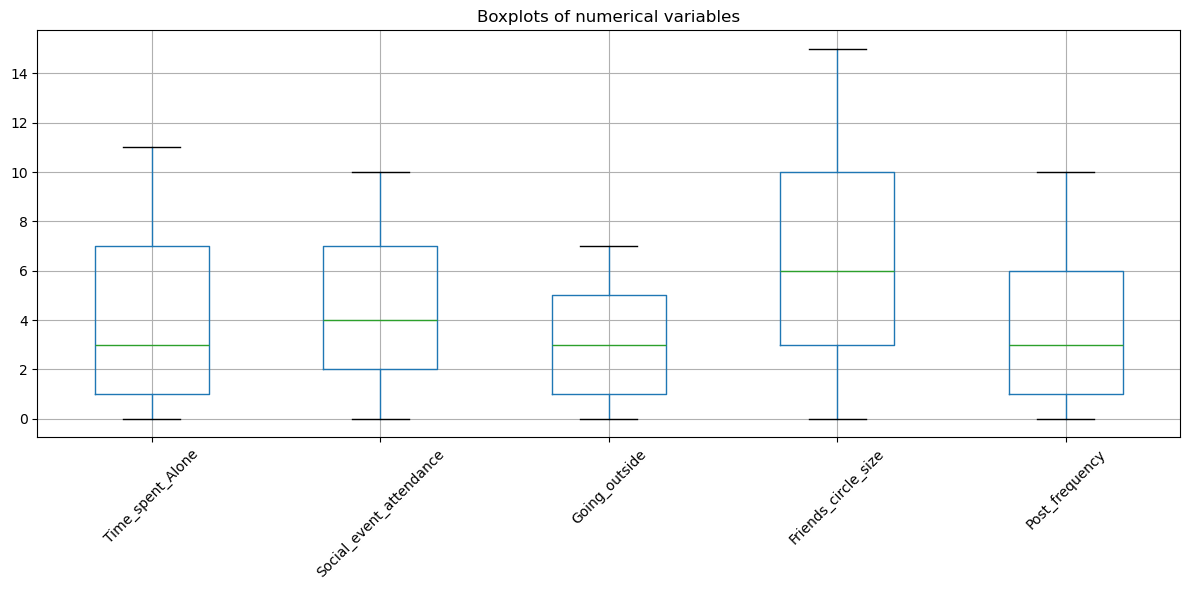

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
numerical_cols = ["Time_spent_Alone", "Social_event_attendance", "Going_outside",
                  "Friends_circle_size", "Post_frequency"]

data[numerical_cols].boxplot()
plt.title("Boxplots of numerical variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
data["Stage_fear"] = data["Stage_fear"].map({"No": 0, "Yes": 1})
data["Personality"] = data["Personality"].map({"Introvert": 0, "Extrovert": 1})
data["Drained_after_socializing"] = data["Drained_after_socializing"].map({"No": 0, "Yes": 1})

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=["Personality"])
Y = data["Personality"]

# Identify numerical columns to scale
num_cols = ["Time_spent_Alone", "Social_event_attendance", "Going_outside",
            "Friends_circle_size", "Post_frequency"]

# Standardize numerical features (zero mean, unit variance)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# Preview the first few rows of the training set
X_train.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
1648,-1.242570,0,1.322022,-0.086981,0,0.333564,0.406606
332,-1.242570,0,0.974042,0.814585,0,-0.136287,1.093026
2354,1.693470,1,-0.765857,-0.537763,1,-1.075991,-1.309442
1094,-0.948966,0,0.278082,0.814585,0,0.803416,0.406606
235,-0.068154,1,-1.461817,-0.537763,1,-1.075991,-0.085994


For this dataset, we will use the `two_layer_model`—a fully custom neural network implementing the architecture:

$$
\text{LINEAR} \rightarrow \text{RELU} \rightarrow \text{LINEAR} \rightarrow \text{SIGMOID}
$$

This model consists of one hidden layer and one output layer, making it well-suited for our binary classification task (predicting whether a person is an extrovert or introvert).

The function trains the network using gradient descent, computes the forward and backward passes, updates parameters iteratively, and tracks the cost over time.

This two-layer architecture is sufficient to capture non-linear patterns while remaining efficient to train. We'll now apply this model to the preprocessed personality dataset.


In [70]:
import numpy as np
import copy

def two_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):
    
    np.random.seed(1)
    costs = []

    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Training loop
    for i in range(num_iterations):
        
        # Forward propagation
        AL, caches = L_layers_model_forward(X, parameters)

        # Compute cost
        cost = cost_function(AL, Y)

        # Backward propagation
        grads = L_layers_model_backward(AL, Y, caches)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost:.4f}")
            costs.append(cost)
    
    return parameters, costs


In [72]:
# Transpose the training data to match the expected input shape for our neural network
# Our implementation expects input features as columns: shape (n_x, m)
X_train_np = X_train.T  # (n_x, m) where n_x = number of features, m = number of examples

# Reshape the labels to a row vector to match the shape expected by the cost and backward functions
# Shape should be (1, m), where m = number of examples
Y_train_np = y_train.values.reshape(1, -1)  # (1, m)


Cost after iteration 0: 1.3824
Cost after iteration 100: 0.4497
Cost after iteration 200: 0.3973
Cost after iteration 300: 0.3740
Cost after iteration 400: 0.3617
Cost after iteration 500: 0.3540
Cost after iteration 600: 0.3483
Cost after iteration 700: 0.3434
Cost after iteration 800: 0.3391
Cost after iteration 900: 0.3352
Cost after iteration 1000: 0.3317
Cost after iteration 1100: 0.3284
Cost after iteration 1200: 0.3253
Cost after iteration 1300: 0.3224
Cost after iteration 1400: 0.3197
Cost after iteration 1500: 0.3171
Cost after iteration 1600: 0.3146
Cost after iteration 1700: 0.3123
Cost after iteration 1800: 0.3102
Cost after iteration 1900: 0.3082


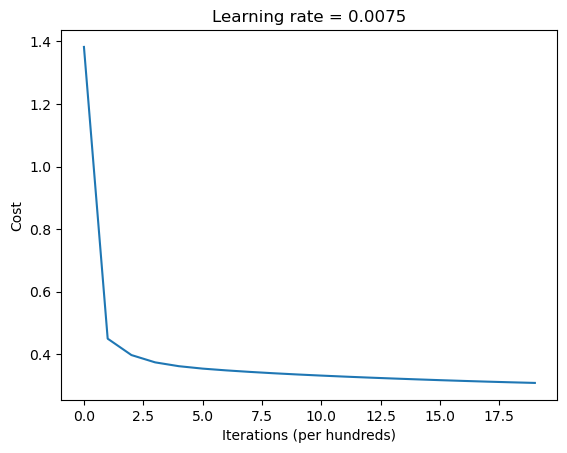

In [101]:
# Define the architecture of the network
# layers_dims = [number of input features, number of neurons in hidden layer, 1 output neuron]
layers_dims = [X_train_np.shape[0], 4, 1]  # 4 neurons in the hidden layer is a simple starting point

# Define a function to visualize the training loss over time
def plot_costs(costs, learning_rate=0.01):
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()

# Train the 2-layer neural network on the training set
# We'll run for 2000 iterations and print the cost every 100 steps
parameters, costs = two_layer_model(
    X_train_np, Y_train_np,
    layers_dims,
    learning_rate=0.0075,
    num_iterations=2000,
    print_cost=True
)

# Plot the cost curve to visualize how well the model learned over time
plot_costs(costs, learning_rate=0.0075)


In [91]:
def predict(X, parameters):
    # Perform forward propagation using learned parameters
    AL, caches = L_layers_model_forward(X, parameters)

    # Convert probabilities to binary predictions (0 or 1)
    Y_pred = (AL > 0.5).astype(int)

    return Y_pred

In [93]:
def accuracy(Y_pred, Y_true):
    return np.mean(Y_pred == Y_true) * 100

In [103]:
Y_pred_train = predict(X_train_np, parameters)
train_acc = accuracy(Y_pred_train, Y_train_np)
print(f"Train accuracy: {train_acc:.2f}%")
X_test_np = X_test.T
Y_test_np = y_test.to_numpy().reshape(1, -1)
Y_pred_test = predict(X_test_np, parameters)
test_acc = accuracy(Y_pred_test, Y_test_np)
print(f"Test accuracy: {test_acc:.2f}%")


Train accuracy: 93.06%
Test accuracy: 89.20%



---

### Applying the L-Layer Neural Network to Image Classification

We have a dataset composed of **500 images** of Pandas and Bears generated by DALL·E Mini. Each image is originally 256x256 pixels, but to reduce the input size and computational cost, **we will resize all images to 64x64 pixels** before processing.

Our goal is binary classification: identifying whether an image contains a Panda or a Bear.

Since our neural network is a **fully connected (dense) model without convolutional layers**, we must **flatten each resized image into a 1D vector** before feeding it into the model. For RGB images, this means each image will have 64 × 64 × 3 = 12,288 features.

We will train a **4-layer neural network** on this data, with two hidden layers containing 8 neurons each. This architecture is a good balance between model complexity and the size of the dataset.


---



In [107]:
import os
import numpy as np
from PIL import Image

def load_rgb_images_to_numpy(data_dir, image_size=(64, 64)):
    X = []  # List to store image data
    Y = []  # List to store labels

    # Define class labels with their numeric values
    class_labels = {"Pandas": 0, "Bears": 1}

    # Loop through each class folder
    for class_name, label in class_labels.items():
        class_dir = os.path.join(data_dir, class_name)
        
        # Loop through all images in the class folder
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            try:
                # Open the image and convert it to RGB (3 color channels)
                img = Image.open(img_path).convert('RGB')
                
                # Resize the image to the desired size (64x64)
                img = img.resize(image_size)
                
                # Convert the image to a NumPy array and normalize pixel values between 0 and 1
                img_array = np.array(img) / 255.0
                
                # Flatten the 3D image array (64x64x3) into a 1D vector (length 12288)
                img_flat = img_array.reshape(-1)
                
                # Add the flattened image vector to our dataset
                X.append(img_flat)
                
                # Add the corresponding label (0 for Panda, 1 for Bear)
                Y.append(label)
            
            except Exception as e:
                # Print any errors while loading images but continue processing other files
                print(f"Error loading image {img_path}: {e}")

    # Convert the list of images to a NumPy array and transpose it to shape (features, samples)
    X = np.array(X).T
    
    # Convert labels to a NumPy array and reshape to (1, samples)
    Y = np.array(Y).reshape(1, -1)

    return X, Y


In [109]:
data_dir = r"C:\Users\DELL\Downloads\bear_pandas\PandasBears\Train"
X, Y = load_rgb_images_to_numpy(data_dir, image_size=(64, 64))

print(f"X shape: {X.shape}, Y shape: {Y.shape}")

X shape: (12288, 500), Y shape: (1, 500)


In [111]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X.T and Y.T transpose the data to have samples as rows (shape: m x n_features)
# test_size=0.1 means 10% of data will be reserved for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(
    X.T, Y.T, test_size=0.1, random_state=42
)

# Transpose the datasets back to original format where each column is a sample
# Now X_train, X_test have shape (features, samples)
# And Y_train, Y_test have shape (1, samples)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T



### Improving Model Training Stability and Performance

During initial experiments with the neural network, we encountered a common problem: the cost remained constant and high (around 0.6931), and the model predictions did not improve. This indicated that the network was not learning properly.

Two key improvements were made to address this issue:

1. **He Initialization for Parameters**

   Instead of initializing weights randomly or with small values, we used **He initialization**. This method initializes weights by scaling them according to the number of units in the previous layer. He initialization helps maintain stable variance of activations across layers, which facilitates better gradient flow during training, especially when using ReLU activations.

2. **Numerical Stability in the Cost Function**

   To avoid computational issues with the logarithm function (e.g., log(0) which is undefined and leads to NaNs), we clipped the output probabilities `AL` to a small range away from 0 and 1:

   ```python
   AL = np.clip(AL, 1e-8, 1 - 1e-8)
   ```

   This clipping ensures that when calculating the cross-entropy loss:

   $$
   \text{cost} = - \frac{1}{m} \sum \left[ Y \log(AL) + (1 - Y) \log(1 - AL) \right]
   $$

   the logarithm arguments are always valid, preventing numerical instability.

---

These two adjustments led to meaningful decreases in cost during training and improved prediction accuracy. With these fixes, we proceed to implement and train our **4-layer neural network** on the dataset.

---



In [114]:
def cost_function(AL, Y):
    AL = np.clip(AL, 1e-8, 1 - 1e-8)  # avoid log(0)
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    return np.squeeze(cost)


In [116]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l-1])  # He initialization
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [122]:
def four_layer_model(X, Y, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a 4-layer neural network: 
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    """
    np.random.seed(1)
    costs = []
    
    n_x = X.shape[0]
    layers_dims = [n_x, 8, 8, 8, 1]  # input + 3 hidden layers with 8 neurons + output
    
    # Initialize weights and biases
    parameters = initialize_parameters(layers_dims)
    
    for i in range(num_iterations):
        # Forward propagation through all layers
        AL, caches = L_layers_model_forward(X, parameters)
        
        # Compute current cost
        cost = cost_function(AL, Y)
        
        # Backward propagation to get gradients
        grads = L_layers_model_backward(AL, Y, caches)
        
        # Update parameters using gradient descent
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print cost every 100 iterations if requested
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost:.4f}")
            costs.append(cost)
            
    return parameters, costs


Cost after iteration 0: 0.7656
Cost after iteration 100: 0.2890
Cost after iteration 200: 0.1680
Cost after iteration 300: 0.1019
Cost after iteration 400: 0.0652
Cost after iteration 500: 0.0445
Cost after iteration 600: 0.0324
Cost after iteration 700: 0.0245
Cost after iteration 800: 0.0194
Cost after iteration 900: 0.0156
Cost after iteration 1000: 0.0130
Cost after iteration 1100: 0.0110
Cost after iteration 1200: 0.0095
Cost after iteration 1300: 0.0083
Cost after iteration 1400: 0.0073
Cost after iteration 1500: 0.0065
Cost after iteration 1600: 0.0059
Cost after iteration 1700: 0.0053
Cost after iteration 1800: 0.0048
Cost after iteration 1900: 0.0044


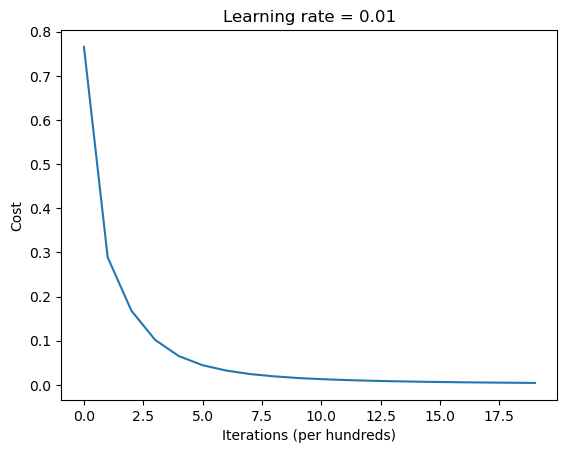

In [124]:
# Define layer dimensions for our dataset: input size, three hidden layers with 8 neurons each, and output layer
layers_dims = [X_train.shape[0], 8, 8, 8, 1]

# Train the 4-layer neural network
parameters, costs = four_layer_model(
    X_train, 
    Y_train,
    learning_rate=0.01,
    num_iterations=2000,
    print_cost=True
)

# Plot the cost over iterations
plot_costs(costs, learning_rate=0.01)



## Conclusion

In this project, we implemented neural networks from scratch and applied them to two distinct classification tasks: a tabular dataset for personality prediction (introvert vs extrovert) and an image dataset for classifying pandas and bears.

### Introvert/Extrovert Classification (Tabular Data)

For the personality classification, we used a **2-layer neural network**. The training process showed a steady decrease in the cost function, starting from a high initial cost around **1.38** and gradually reducing to approximately **0.31** after 1900 iterations. This consistent reduction indicates that the model effectively learned to distinguish between introverted and extroverted personalities based on the input features. Although the model is relatively simple, it demonstrates the potential of neural networks to capture patterns in tabular data.

### Pandas/Bears Image Classification

For the image classification task, we designed a deeper **4-layer neural network** to handle the higher complexity of image data, with each image resized and flattened to feed into the fully connected layers. The cost decreased rapidly from about **0.77** at the start to as low as **0.0044** by iteration 1900, reflecting strong learning progress. This substantial reduction in cost shows that our neural network could effectively capture the differences between the two image classes, despite working with flattened RGB pixel vectors rather than a convolutional neural network (CNN).

---

### Summary

* Both models successfully converged with a clear downward trend in the cost function, confirming that our implementation of forward propagation, cost calculation, backward propagation, and parameter updates works correctly.
* The simpler 2-layer model was sufficient for the tabular personality data, while the more complex 4-layer model was necessary for the image classification task due to the higher dimensionality and complexity of the input.
* Although these neural networks were implemented from scratch without the use of specialized libraries or CNN architectures, the results demonstrate fundamental principles of neural network training and their applicability to diverse data types.

This foundation paves the way for exploring more advanced architectures and techniques, such as convolutional layers for images or deeper networks for complex tabular data.


